In [41]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [42]:
slice = 112

[0. 1. 2. 4.]
(192, 192, 155)


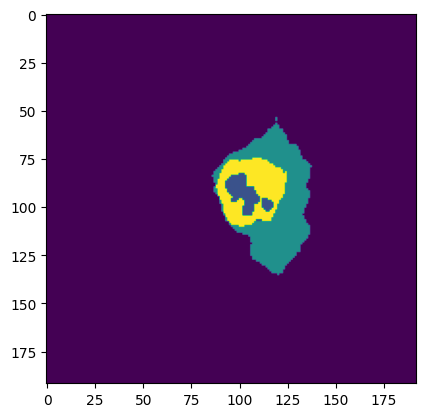

In [43]:
im = nib.load("../sss-out/pred.nii.gz").get_fdata()
print(np.unique(im))
print(im.shape)
plt.imshow(im[:, :, slice].T)

[0. 1. 2. 4.]
(192, 192, 155)


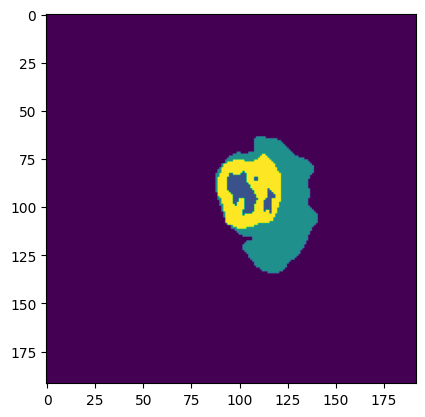

In [44]:
im = nib.load("../data/unprocessed/BraTS2021_00003/BraTS2021_00003_seg.nii.gz").get_fdata()
mix = 20
max = 212
im = im[mix:max, mix:max]
print(np.unique(im))
print(im.shape)
plt.imshow(im[:, :,slice].T)